# 1.1 탐색적 데이터 분석의 과정 
- pg.43 (이것이 데이터 분석이다)
- 아직 활용된 적이 없는 혹은 정제되지 않은 데이터를 raw data 라고 부릅니다.
1. 데이터의 출처와 주제에 대해 이해한다.
2. 데이터의 크기를 알아본다.
3. 데이터의 구성 요소(피처)를 살펴본다.

## 데이터의 실제적인 내용 탐색
- 피처의 속성 탐색
    - 테이터에 질문을 던지는 행위 (예) 우리 반의 평균 키는 몇이나 될까?
- 피처간의 상관관계 탐색
    - 여러 개의 피처가 서로에게 미치는 영향력을 알아보는 것.
    - 공분산, 상관 계수 같은 개념을 포함
- 시각화를 통한 탐색

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = "python-data-analysis/data/chipotle.tsv"
chipo = pd.read_csv(file_path, sep = '\t')

In [5]:
print(chipo.shape)
print("----------------------------------")
print(chipo.info())

(4622, 5)
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [6]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


- order_id : 주문 번호
- quantity: 아이템의 주문 수량
- item_name: 주문한 아이템의 이름
- choice_description : 주문한 아이템의 상세 선택 옵션
- item_price : 주문 아이템의 가격 정보

In [10]:
# 기초 통계량 출력함수 describe()    
# order_id 는 숫자의 의미를 가지지 않기 때문에 str로 변환
chipo['order_id'] = chipo['order_id'].astype(str)
chipo.describe().round(2)

,quantity
count,4622.00
mean,1.08
std,0.41
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,15.00


In [12]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


In [27]:
#가장 많이 주문한 아이템 Top10을 출력합니다.
item_counts=chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate (item_counts.iteritems(), 1):
    print("Top", idx, ":", val, "=", cnt)

Top 1 : Chicken Bowl = 726
Top 2 : Chicken Burrito = 553
Top 3 : Chips and Guacamole = 479
Top 4 : Steak Burrito = 368
Top 5 : Canned Soft Drink = 301
Top 6 : Steak Bowl = 211
Top 7 : Chips = 211
Top 8 : Bottled Water = 162
Top 9 : Chicken Soft Tacos = 115
Top 10 : Chicken Salad Bowl = 110


In [26]:
item_counts

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [31]:
# 아이템별 주문 개수
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] #아이템 주문 개수를 출력

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [35]:
# 아이템별 주문 총량을 계산
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # 아이템별 주문 총량을 출력

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

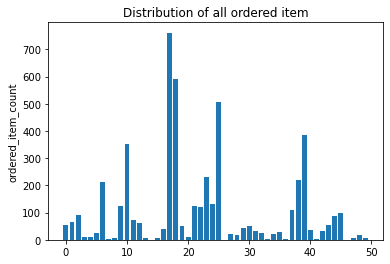

In [43]:
#시각화
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [44]:
#pg57 부터